In [2]:
# Основные фреймворки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Отключение ворнингов
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Настройка визуализации
import matplotlib
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

In [164]:
# Используемые фреймворки

from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix, classification_report, plot_precision_recall_curve, plot_roc_curve

----

### Описание данных

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения пима.

In [6]:
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
# Размер
data.shape

(768, 9)

**Признаки:**
- Pregnancies - беременности;
- Glucose - глюкоза:
- BloodPressure	 - кровяное давление;
- SkinThickness - толщина кожи;
- Insulin - инсулин;
- BMI - индекс массы тела;
- DiabetesPedigreeFunction - вероятность диабета в зависимости от наследственности;
- Age - возраст;
- Outcome - наличие диабета.

In [10]:
# Имена колонок
features = data.columns[:-1]
target = data.columns[-1]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


--------

### Первичный анализ данных

Проверка на отсутсвующие значения:

In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**ЦЕЛЕВОЙ ПРИЗНАК**

Количество наблюдений каждого класса:

In [16]:
data[target].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

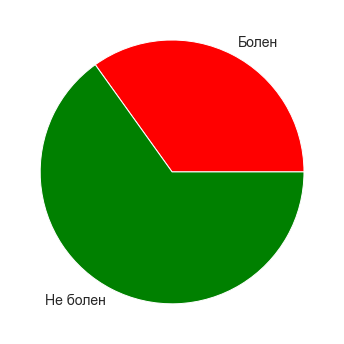

In [22]:
plt.figure(figsize=(5,5))
plt.pie([data[target].value_counts()[1], data[target].value_counts()[0]], labels=['Болен', 'Не болен'], colors=['r', 'g'])
plt.tight_layout()

В целевом признаке наблюдается значительный дисбаланс: класс "Не болен" составляет 65%, а класс "Болен" 35%.

**ПРИЗНАКИ**

In [24]:
data[features].describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

- Признаки значительно различаются по значениям наблюдений, то есть в предобработке необходимо выполнить предобработку.
- Также в признаке "Инсулин" наблюдается большое значение среднего отклонения.

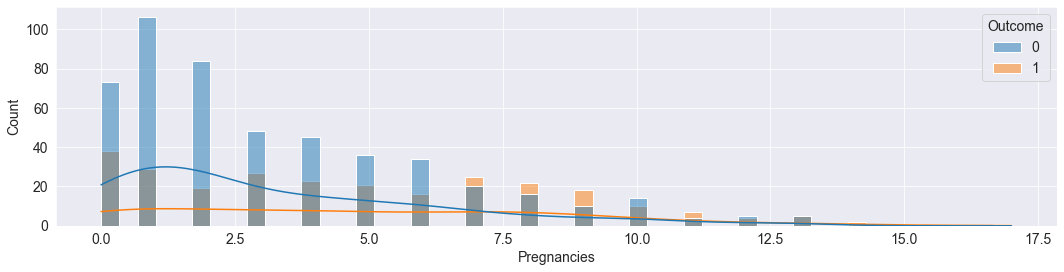

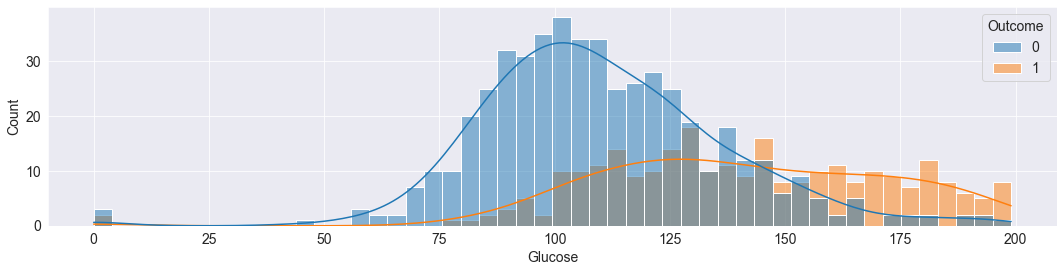

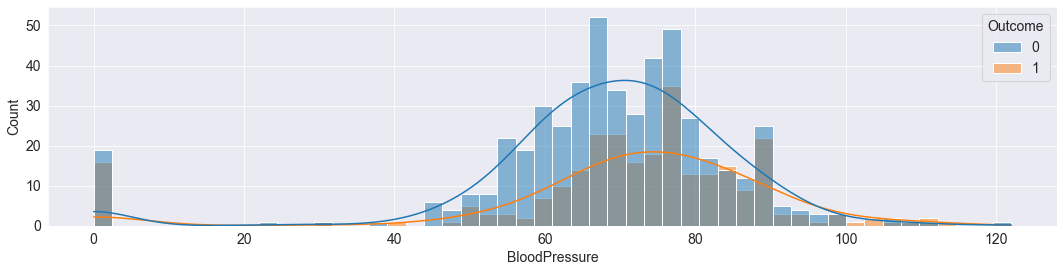

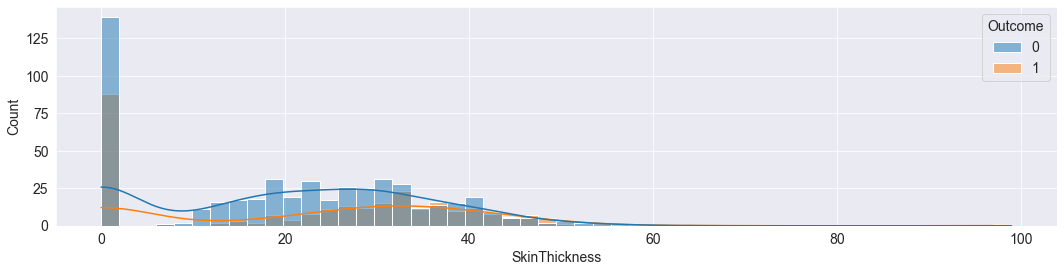

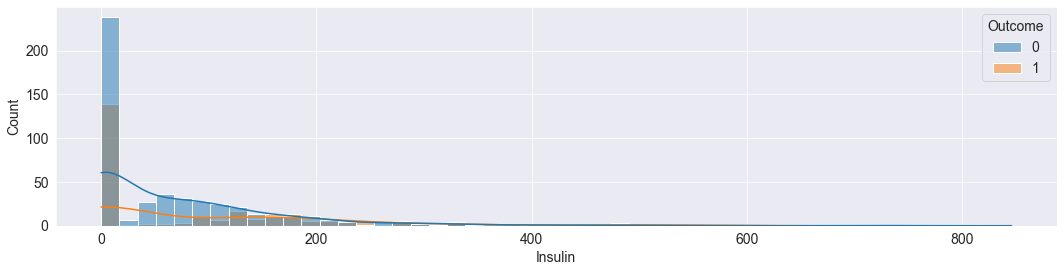

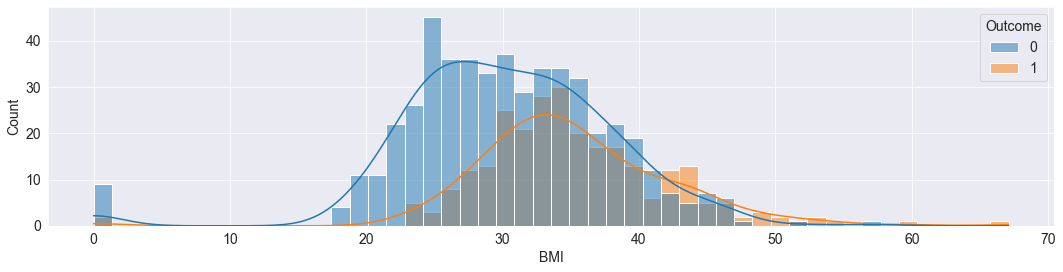

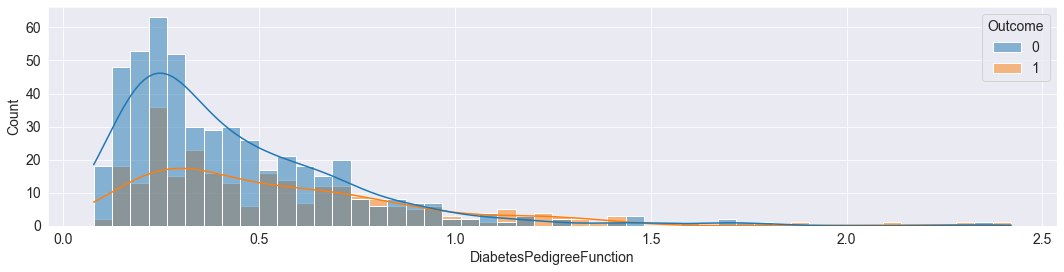

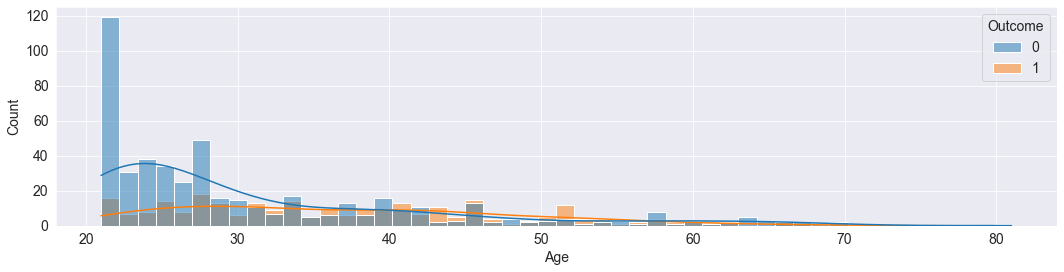

In [28]:
for feature in features:
    _ = plt.figure(figsize=(15, 4))
    _ = sns.histplot(data=data, x=feature, hue=target, bins=50, kde=True)
    plt.tight_layout()

Анализ графиков:
- У женщин с 7, 8, 9 и 11 преобладает класс "Болен". Признак имеет явное смещение в виде "правого хвоста".
- При глюкозе боле 140 подтверждается статус "Болен". Также наблюдаются наблюдения со значением 0, которые могут хараетеризовать отсутсвие информации. Распредление класса "Не болен" близок к нормальному, класс "Болен" имеет левостороннюю асимметрию.
- В признаке "Кровянное давление" нет четкого разделения в зависмости от класса, но с увеличесниме давления чаще фиксируются случаи заболевания. Распределение классов близко к нормальному с небольшой левосторонней асимметрией. Также наблюдаются значения 0.
- "Толщина кожи" в большинстве имеет значение около 0, а распределение имеет явный "правый хвост".
- "Инсулин" в большинстве имеет значение около 0, а распределение имеет явный "правый хвост". Также признак имеет слишком странное максимальное значение, равное 846.
- С увеличением "Индекса массы тела" у людей чаще подтверждается статус "Болен", так при BMI больше 30 значительно возрастает количество подтвержденных случаев болезни. Распределения близки к нормальному, но  статуст "Не болен" более похож на плато.
- Большиснтво значений "DiabetesPedigreeFunction" находится до значения 0.5. Распределение имеет "правый хвост".
- Большиснтво пациетов моложе 30 лет. У пациентов старше 30 лет чаще подтверждается статус "Болен". 

Так как признак "Инсулин" имеет большое значение std и максимальное значение, рассмотрим данные с инсулином выше 400:

In [41]:
data.loc[data.Insulin>400].sort_values(by='Insulin')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
248            9      124             70             33      402  35.4   
392            1      131             64             14      415  23.7   
645            2      157             74             35      440  39.4   
370            3      173             82             48      465  38.4   
415            3      173             84             33      474  35.7   
220            0      177             60             29      478  34.6   
486            1      139             62             41      480  40.7   
695            7      142             90             24      480  30.4   
153            1      153             82             42      485  40.6   
111            8      155             62             26      495  34.0   
186            8      181             68             36      495  30.1   
753            0      181             88             44      510  43.3   
655            2      155             52             27      540  38.7   
8              2      197             70             45      543  30.5   
286            5      155             84             44      545  38.7   
409            1      172             68             49      579  42.4   
584            8      124             76             24      600  28.7   
247            0      165             90             33      680  52.3   
228            4      197             70             39      744  36.7   
13             1      189             60             23      846  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
248                     0.282   34        0  
392                     0.389   21        0  
645                     0.134   30        0  
370                     2.137   25        1  
415                     0.258   22        1  
220                     1.072   21        1  
486                     0.536   21        0  
695                     0.128   43        1  
153                     0.687   23        0  
111                     0.543   46        1  
186                     0.615   60        1  
753                     0.222   26        1  
655                     0.240   25        1  
8                       0.158   53        1  
286                     0.619   34        0  
409                     0.702   28        1  
584                     0.687   52        1  
247                     0.427   23        0  
228                     2.329   31        0  
13                      0.398   59        1

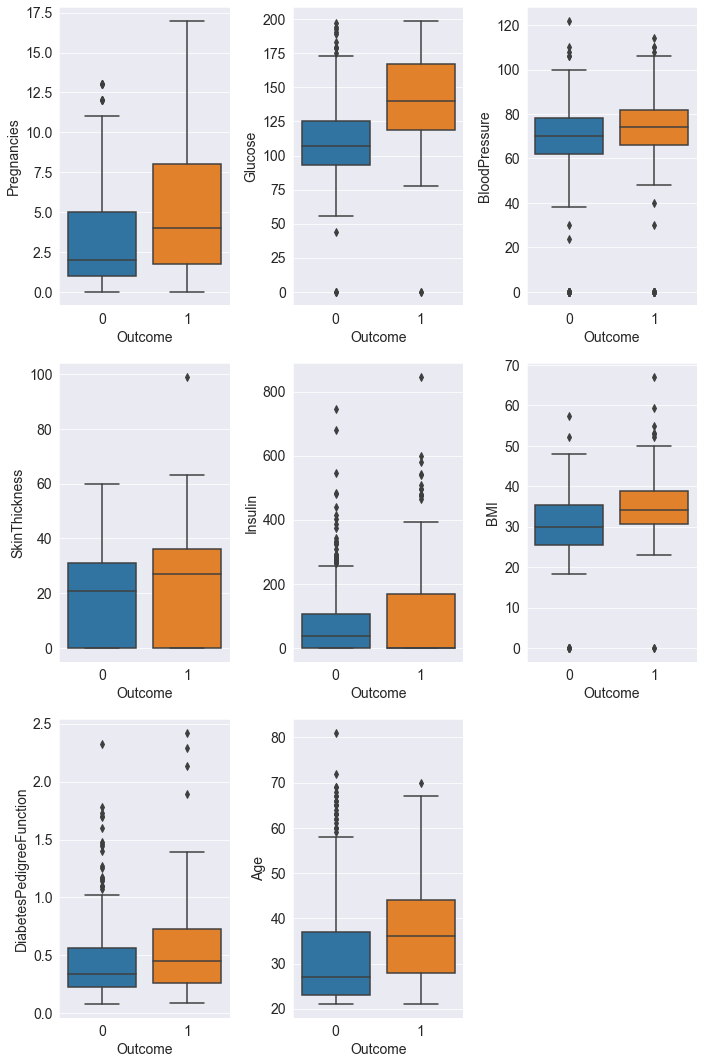

In [58]:
# Графики "ящика с усами"
plt.figure(figsize=(10,15))
for i in range(len(features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x='Outcome', y=features[i])
    plt.tight_layout()

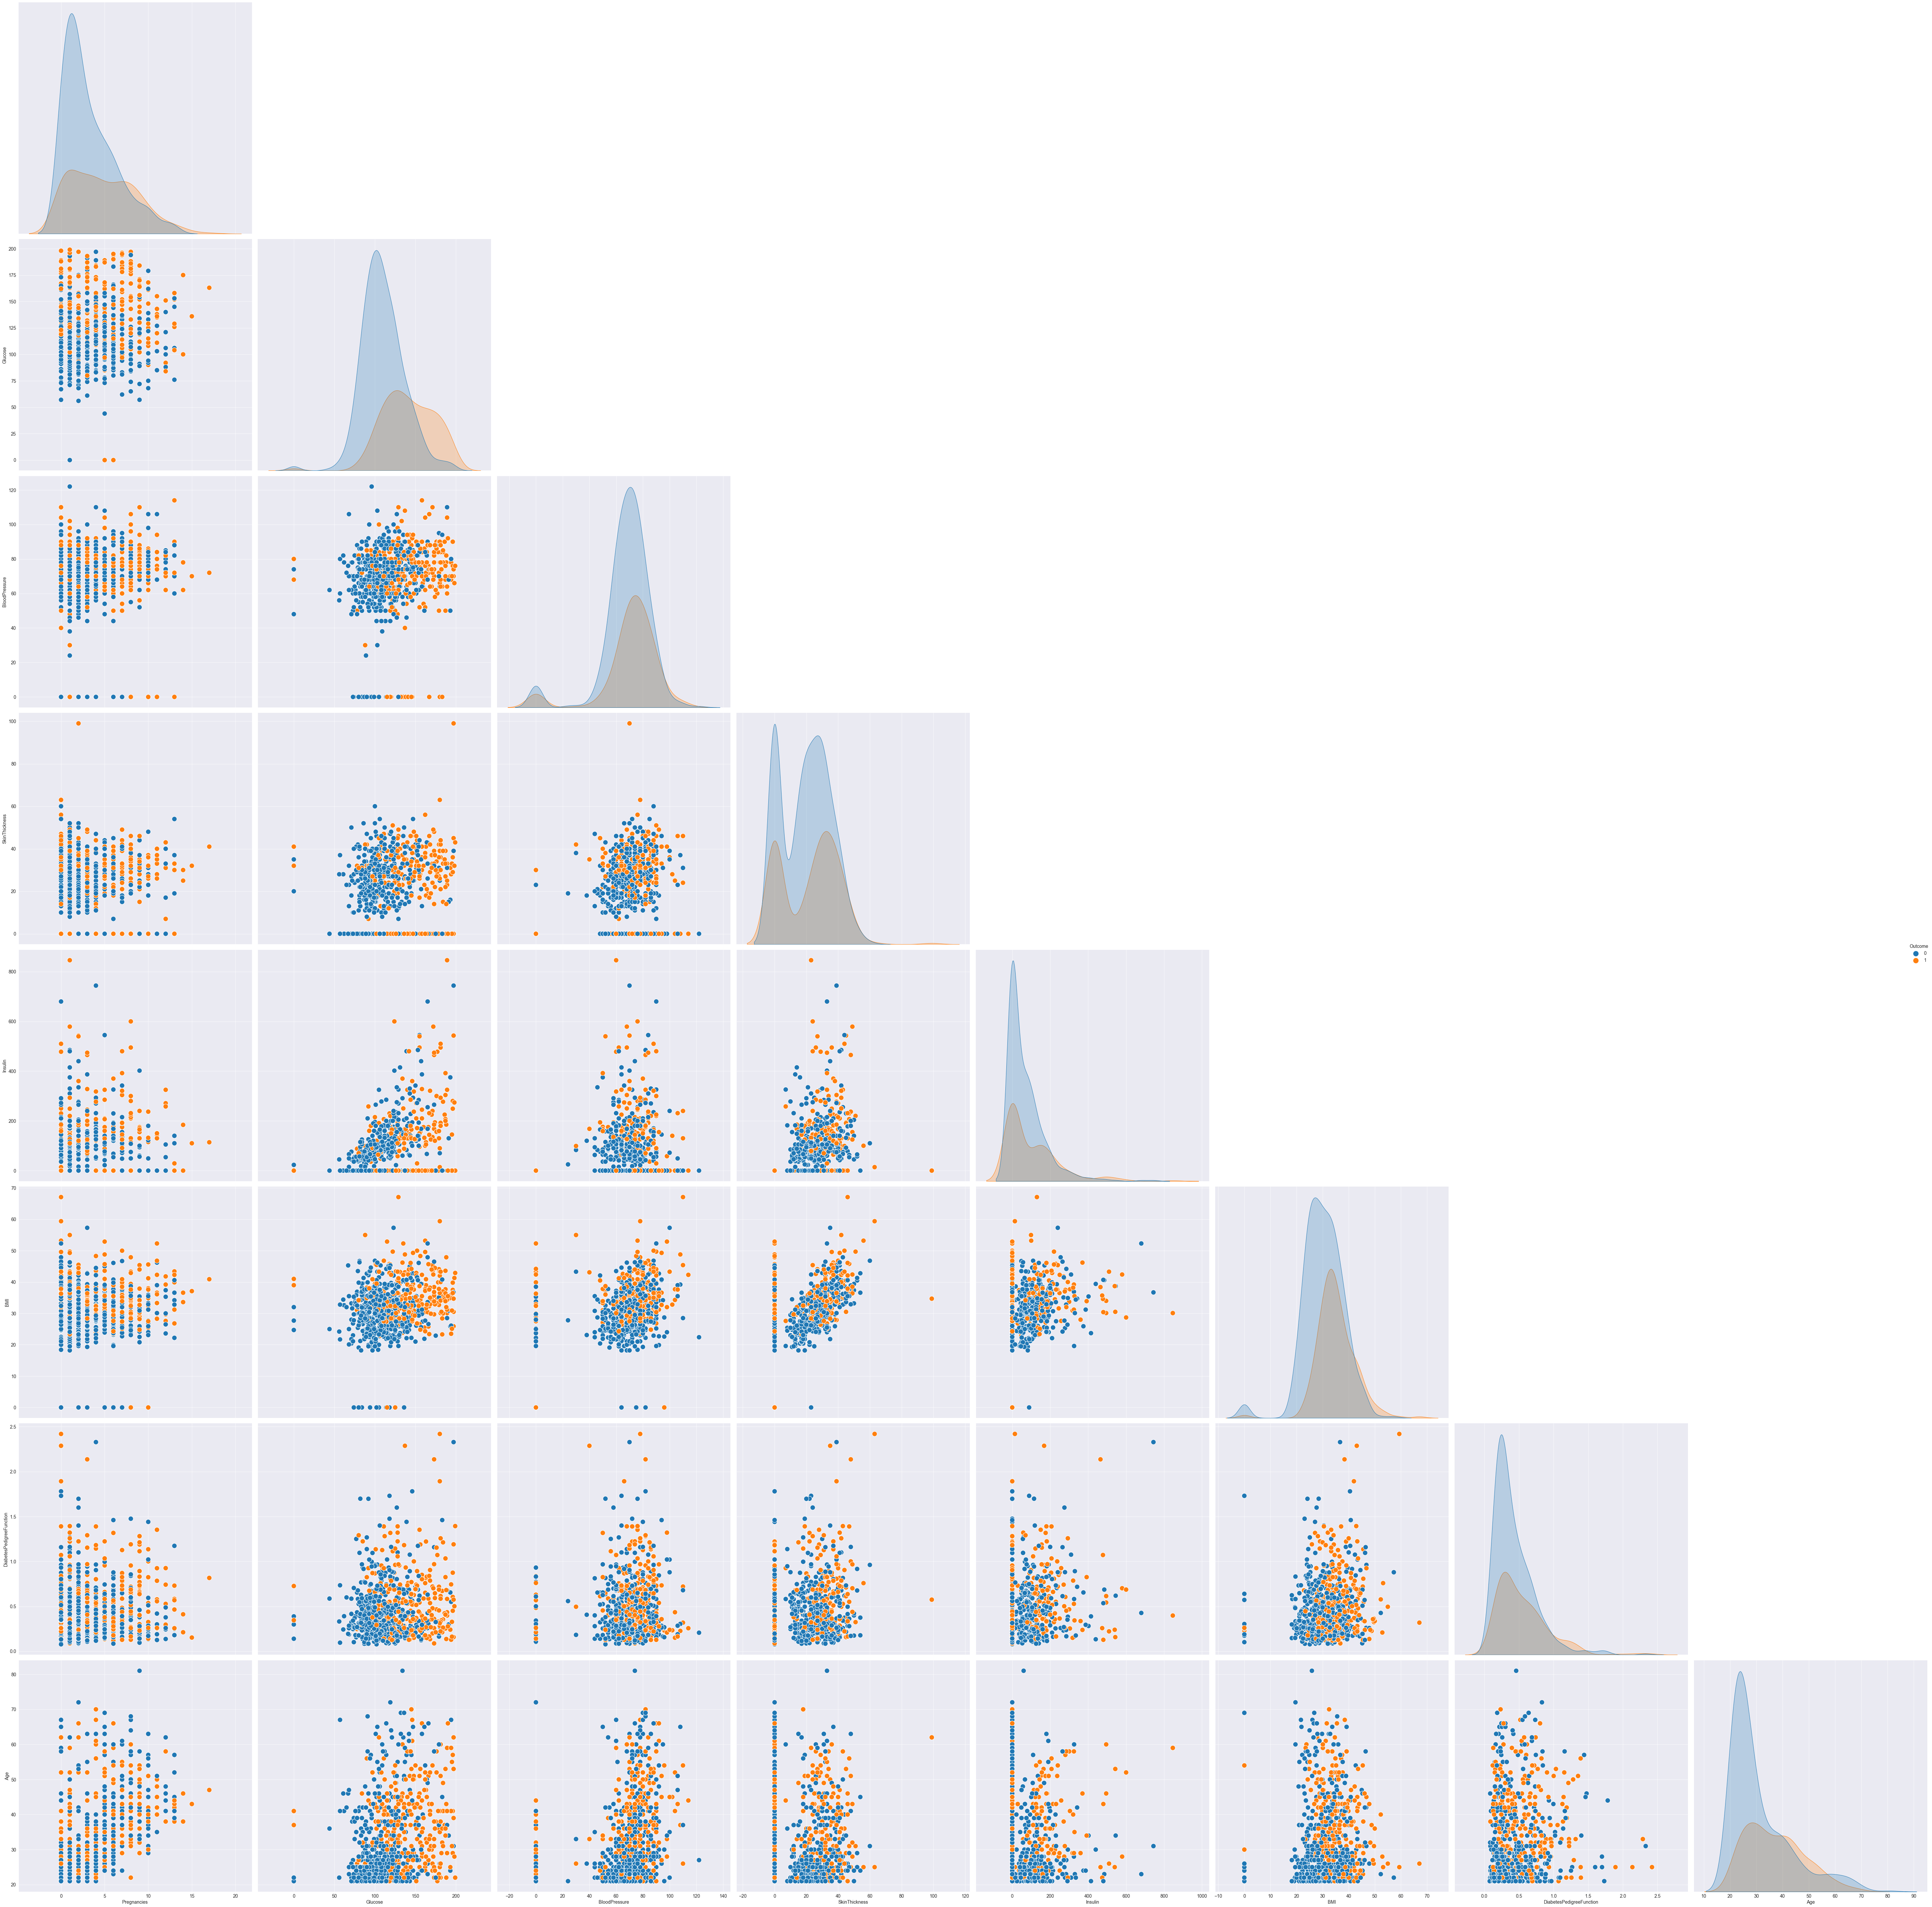

In [44]:
sns.pairplot(data=data, hue=target, corner=True, height=10)
plt.tight_layout()

- На графиках зависмости от Глюкоза видно, что большинство точек "Болен" концентрируются после значения 100. А наблюдения с Глюкозой = 0 выглядят как выбросы.
- Наблюдения с BMI = 0 выглядят как выбросы.
- В "Толщине кожи" наблюдается одна точка в районе 100, которая выглядит как выброс.

interval columns not set, guessing: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


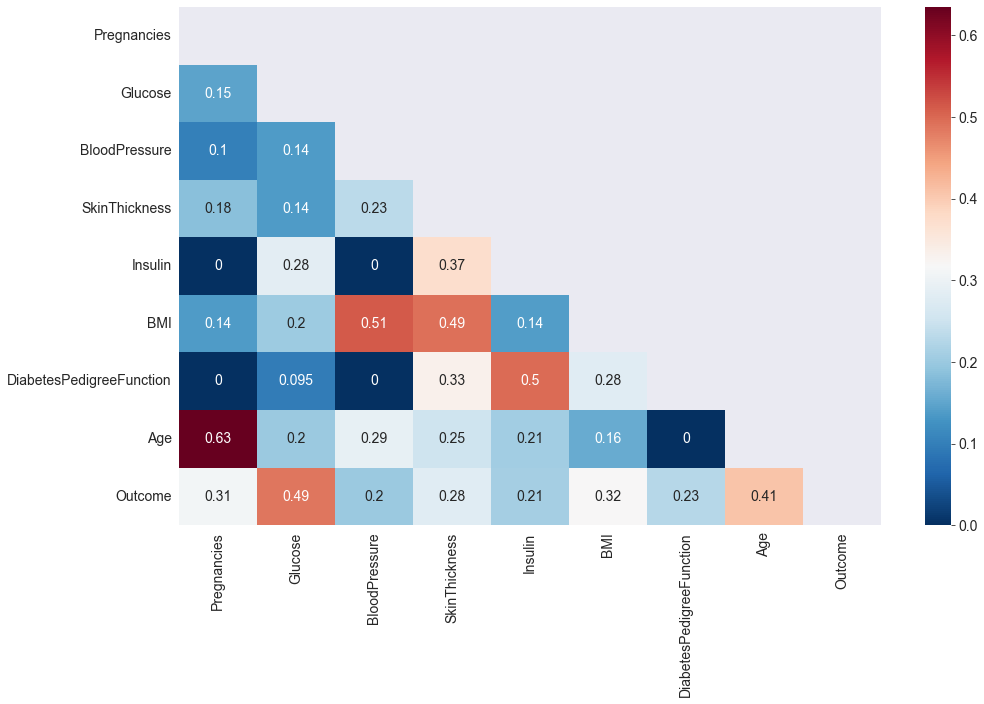

In [48]:
# Матрица корреляций
corr_mtrx = phik_matrix(data)

mask = np.zeros_like(corr_mtrx)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mtrx, xticklabels=corr_mtrx.columns, yticklabels=corr_mtrx.columns, cmap='RdBu_r', annot=True, mask = mask)
plt.tight_layout()
plt.show()

- Наибольшая корреляция с целевым признаком наблюдается с признаками Инсулин и Возраст.
- Самый большой коэффициент корреляции мужде признаками Возраст и Беременности.
- Также значительный коэффицент корреляции наблюдается в парах признаков BMI-Кровянное давление, BMI-Толщина кожи, Инсулин-Наследсвенность. 

-----------

### Предобработка

In [96]:
X_train, X_test = train_test_split(data, test_size=.1, shuffle=True, random_state=42)

In [98]:
class DataPreprocessing:
    def __init__ (self, outline_columns):
        self.outline_columns = outline_columns
        self.scaler = []
        
    def outline (self, data):
        # Замена выбросов
        for feature in self.outline_columns:
            data.loc[data.Outcome==1][feature] = data.loc[data.Outcome==1][feature].median()
            data.loc[data.Outcome==0][feature] = data.loc[data.Outcome==0][feature].median()
            
        data.loc[data.SkinThickness>90].SkinThickness = data.loc[data.Outcome==1].SkinThickness.median()
        return data

    def fit (self, data):
        # Масштабирование
        self.scaler = StandardScaler()
        self.scaler.fit(data)
        
    def transform (self, data):
        data = pd.DataFrame(data=scaler.transform(data), columns=data.columns, index=data.index)
        return data

In [99]:
OUTLINE_COLUMNS = ['Glucose', 'BloodPressure', 'BMI']

preprocessing = DataPreprocessing(OUTLINE_COLUMNS)
X_train = preprocessing.outline(X_train)

y_train = X_train.Outcome
X_train = X_train.drop('Outcome', axis=1)
y_test = X_test.Outcome
X_test = X_test.drop('Outcome', axis=1)
print(f'Размер обучающей выборки: {X_train.shape}, \n{y_train.value_counts()}\n')
print(f'Размер тестовой выборки: {X_test.shape}, \n{y_test.value_counts()}')

preprocessing.fit(X_train)
X_train = preprocessing.transform(X_train)
X_test = preprocessing.transform(X_test)

Размер обучающей выборки: (691, 8), 
0    450
1    241
Name: Outcome, dtype: int64

Размер тестовой выборки: (77, 8), 
0    50
1    27
Name: Outcome, dtype: int64


-----

### Моделирование

In [143]:
def modeling (model, params, X_train, y_train, X_test):
    # Функция настройки гиперпараметров модели и получения вектора предсказания
    
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='f1_macro', cv=5)
    grid.fit(X_train, y_train)
    print(f'Лучшие параметры: {grid.best_params_}')
    
    model = grid.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred



def metrics(true, pred):
    # Функция вывода метрик
    cm = confusion_matrix(true, pred)
    
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Не болен', 'Болен'], yticklabels=['Не болен', 'Болен'], cmap='RdBu_r')
    ax.set_ylabel('TRUE')
    ax.set_xlabel('PREDICT')
    plt.show()
    
    report = classification_report(true, pred)
    return print(report)



def PR_curve(model, df_test, y_test):
    # Функция вывода графика PR-кривых
    fig, ax = plt.subplots(1, 1)
    fig.set_figheight(7)
    fig.set_figwidth(10)

    plot_precision_recall_curve(model, df_test, y_test, pos_label=1, ax=ax, name='Болен')
    plot_precision_recall_curve(model, df_test, y_test, pos_label=0, ax=ax, name='Не болен')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
    
    
def roc_curve(model, df_test, y_test):
    # Функция вывода графика ROC-кривых
    fig, ax = plt.subplots(1, 1)
    fig.set_figheight(7)
    fig.set_figwidth(10)
    
    plot_roc_curve(model, df_test, y_test, pos_label=1, ax=ax, name='Болен')
    plot_roc_curve(model, df_test, y_test, pos_label=0, ax=ax, name='Не болен')
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.show()    

**Логистическая регрессия**

Лучшие параметры: {'C': 0.892}


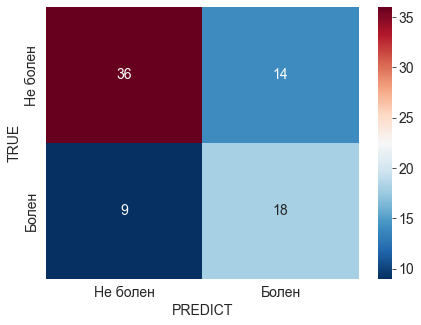

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.56      0.67      0.61        27

    accuracy                           0.70        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.72      0.70      0.71        77



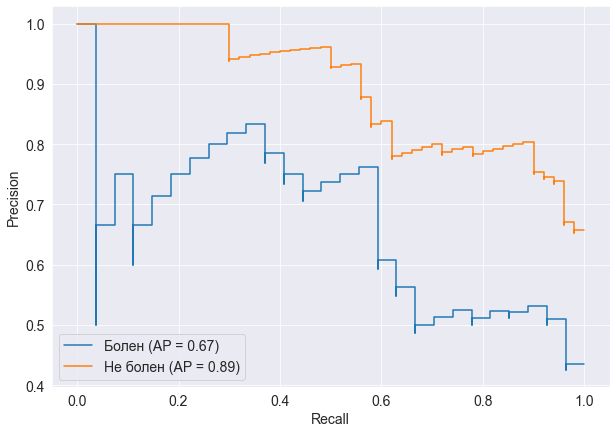

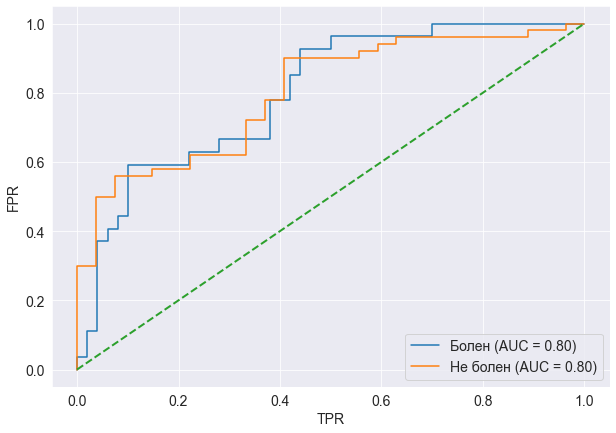

Wall time: 1min 33s


In [145]:
%%time
lr_model = LogisticRegression(random_state=42)
lr_params = {'C': np.arange(0.001, 1.5, 0.001)}
best_model, y_lr = modeling(lr_model, lr_params, X_train, y_train, X_test)

metrics(y_test, y_lr)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

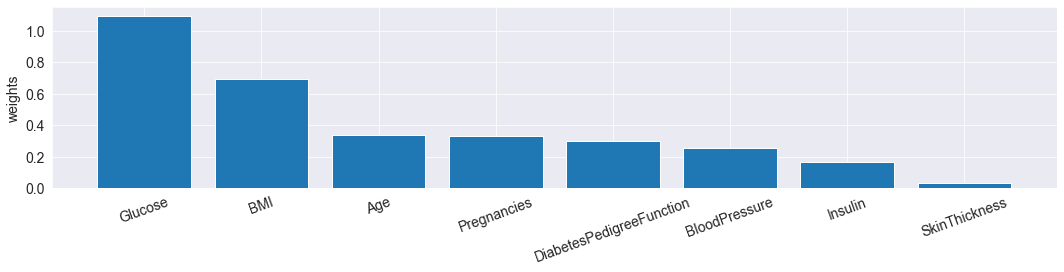

In [151]:
weights_lr = pd.Series(data=abs(best_model.coef_[0,:]), index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 4))
plt.bar(x=weights_lr.index, height=weights_lr.values)
plt.ylabel('weights')
plt.xticks(rotation=20)
plt.tight_layout()

**Дерево решений**

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}


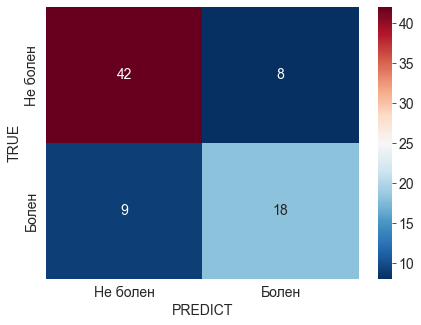

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.69      0.67      0.68        27

    accuracy                           0.78        77
   macro avg       0.76      0.75      0.76        77
weighted avg       0.78      0.78      0.78        77



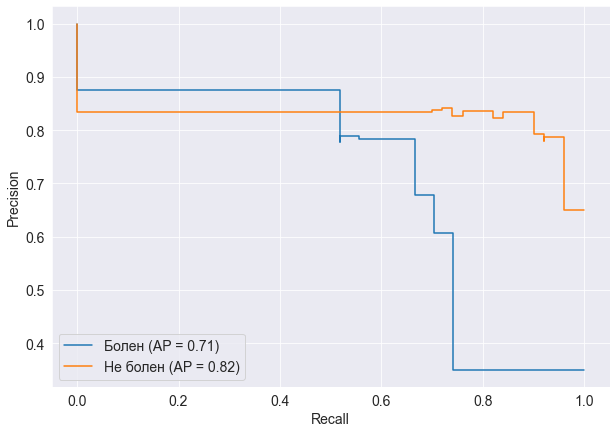

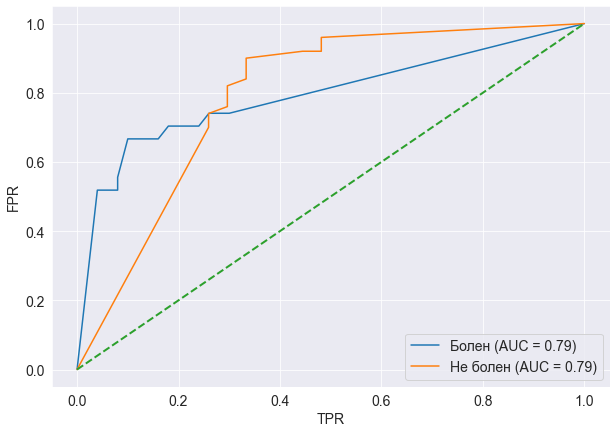

Wall time: 2.91 s


In [171]:
%%time
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': np.arange(2, 10, 2),
            'min_samples_leaf': np.arange(1, 5, 1)}
best_model, y_dt = modeling(dt_model, dt_params, X_train, y_train, X_test)

metrics(y_test, y_dt)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

**Случайный Лес**

Лучшие параметры: {'max_depth': 11, 'min_samples_leaf': 3, 'n_estimators': 80}


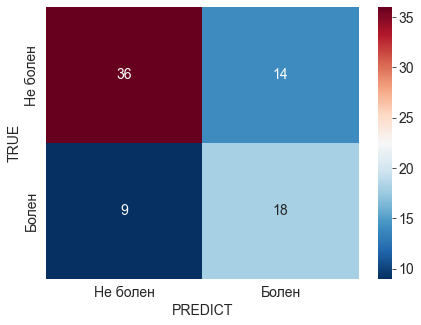

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.56      0.67      0.61        27

    accuracy                           0.70        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.72      0.70      0.71        77



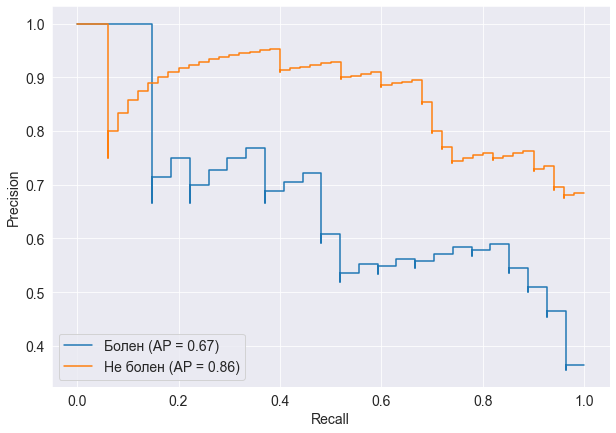

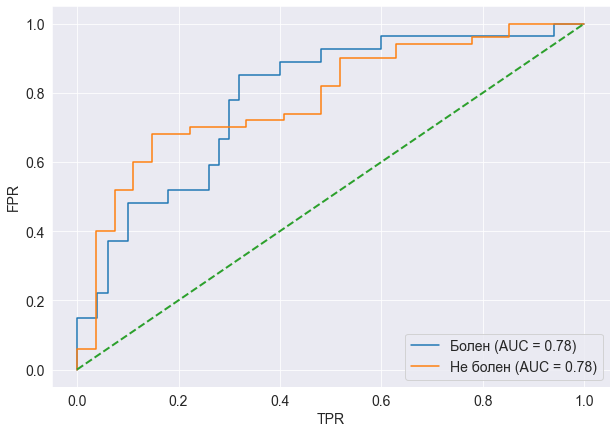

Wall time: 21min 44s


In [155]:
%%time
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': np.arange(10, 100, 10),
            'max_depth': np.arange (2, 15, 2),
            'min_samples_leaf': np.arange(2, 15, 2)}
best_model, y_rf = modeling(rf_model, rf_params, X_train, y_train, X_test)

metrics(y_test, y_rf)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

**KNN**

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 21}


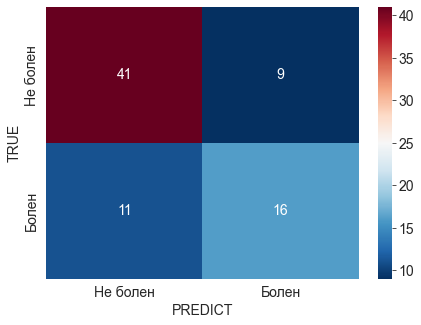

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.64      0.59      0.62        27

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77



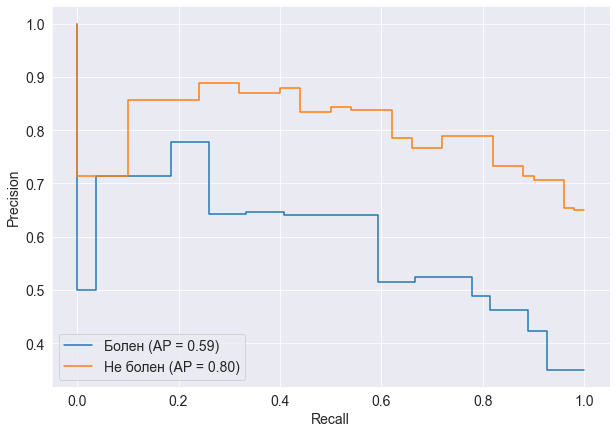

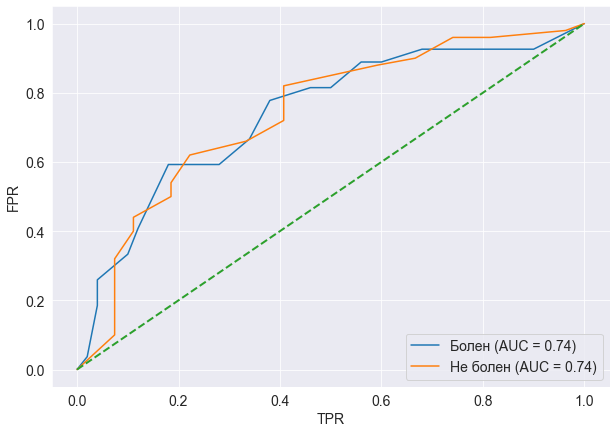

Wall time: 5.96 s


In [158]:
%%time
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(3, 50, 2),
             'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
best_model, y_knn = modeling(knn_model, knn_params, X_train, y_train, X_test)

metrics(y_test, y_knn)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

**Наивный Байесовский Классификатор**

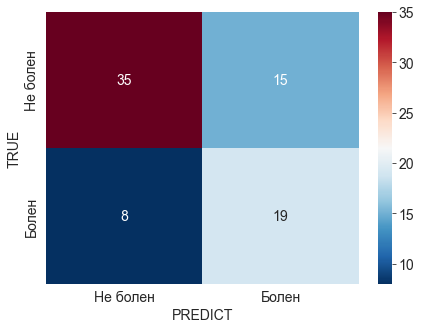

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        50
           1       0.56      0.70      0.62        27

    accuracy                           0.70        77
   macro avg       0.69      0.70      0.69        77
weighted avg       0.72      0.70      0.71        77



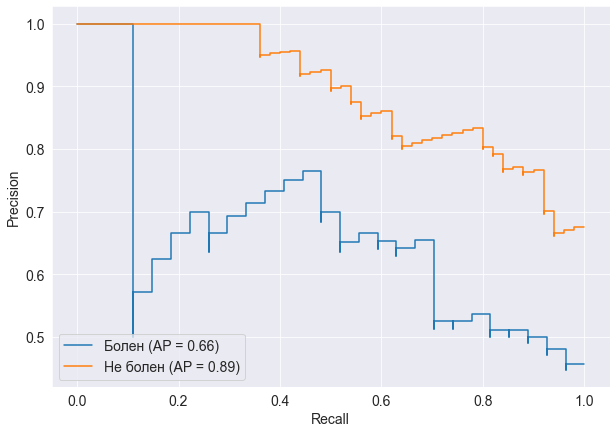

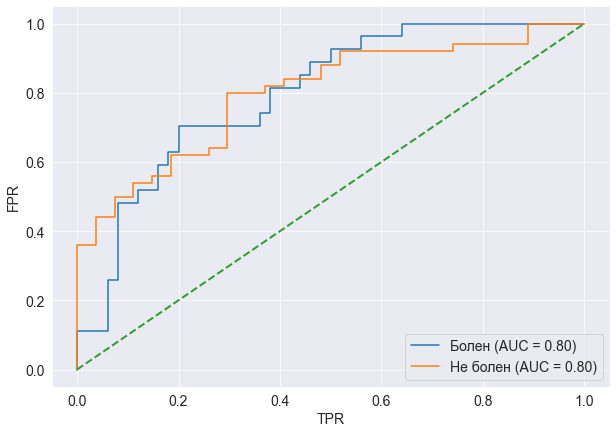

Wall time: 521 ms


In [160]:
%%time
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_bayes = bayes_model.predict(X_test)

metrics(y_test, y_bayes)
PR_curve(bayes_model, X_test, y_test)
roc_curve(bayes_model, X_test, y_test)

**SVM**

Лучшие параметры: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


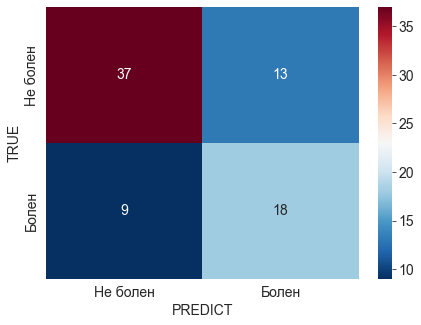

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        50
           1       0.58      0.67      0.62        27

    accuracy                           0.71        77
   macro avg       0.69      0.70      0.70        77
weighted avg       0.73      0.71      0.72        77



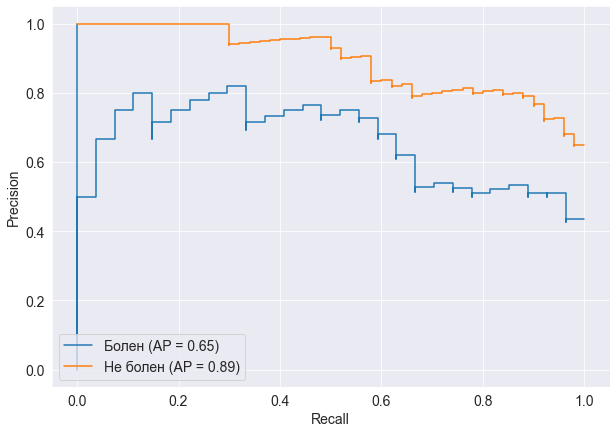

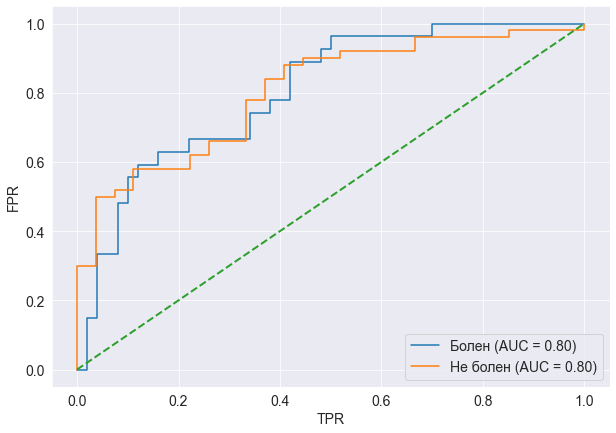

Wall time: 11.4 s


In [163]:
%%time
svc_model = SVC(random_state=42)
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto']}
best_model, y_svc = modeling(svc_model, svc_params, X_train, y_train, X_test)

metrics(y_test, y_svc)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

**Бэггинг на деревьях**

Лучшие параметры: {'max_features': 0.7000000000000001, 'max_samples': 0.7000000000000001, 'n_estimators': 150}


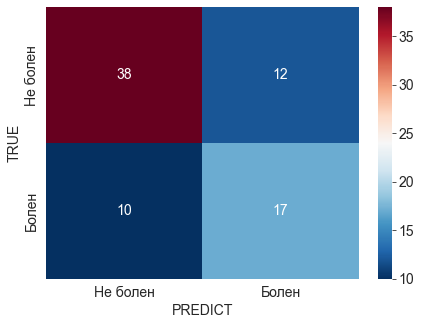

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        50
           1       0.59      0.63      0.61        27

    accuracy                           0.71        77
   macro avg       0.69      0.69      0.69        77
weighted avg       0.72      0.71      0.72        77



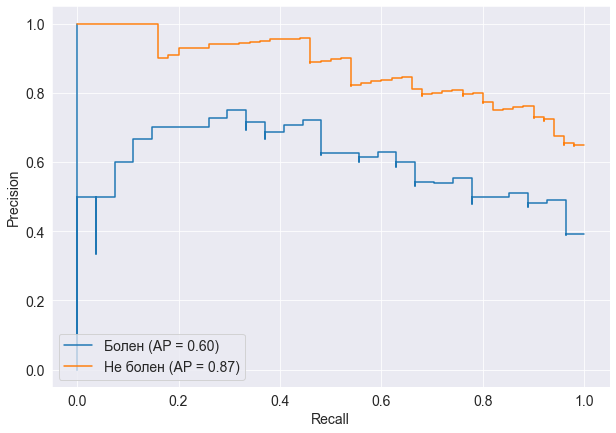

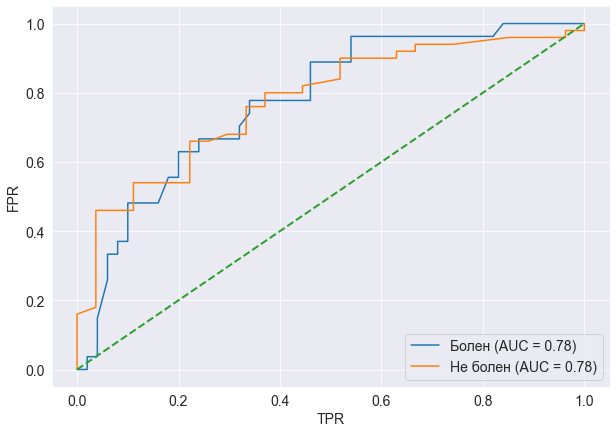

In [172]:
%%time
bag_model = BaggingClassifier(random_state=42)
bag_params = {'n_estimators': np.arange(50, 500, 100),
             'max_samples': np.arange(0.1, 1, 0.3),
             'max_features': np.arange(0.1, 1, 0.3)}

best_model, y_bag = modeling(bag_model, bag_params, X_train, y_train, X_test)

metrics(y_test, y_bag)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)

**Градиентный Бустинг**

Лучшие параметры: {'learning_rate': 0.06999999999999999, 'max_depth': 30, 'n_estimators': 300}


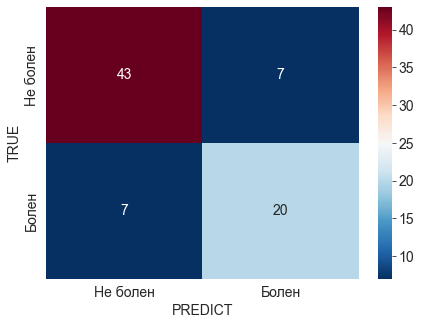

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.74      0.74      0.74        27

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



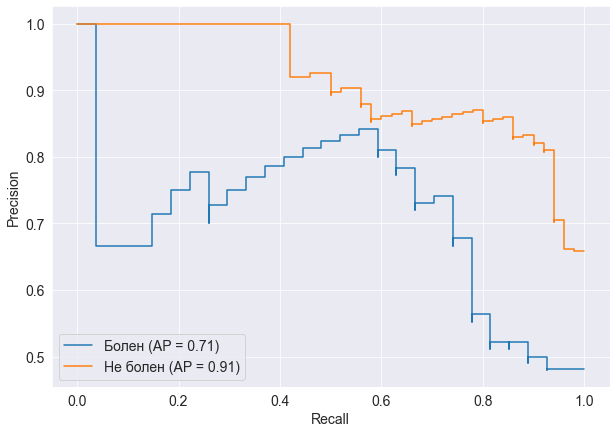

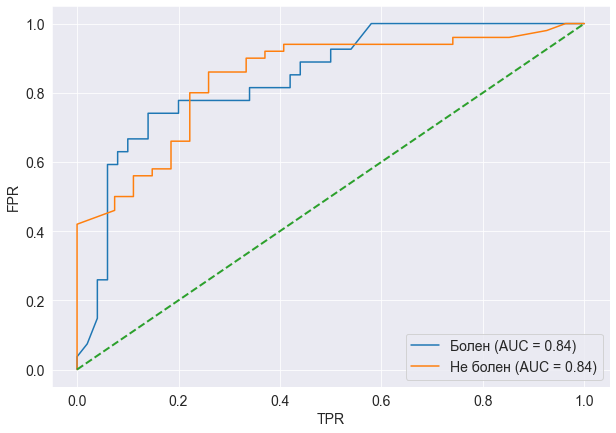

Wall time: 17min 29s


In [174]:
%%time
grc_model = GradientBoostingClassifier(random_state=42)
grc_params = {'learning_rate': np.arange(0.01, 0.1, 0.02),
             'max_depth': np.arange(10, 100, 20),
             'n_estimators': np.arange(100, 500, 100)}

best_model, y_grc = modeling(grc_model, grc_params, X_train, y_train, X_test)

metrics(y_test, y_grc)
PR_curve(best_model, X_test, y_test)
roc_curve(best_model, X_test, y_test)